In [422]:
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger
from nltk.stem.porter import PorterStemmer

In [423]:
import pandas as pd
import textstat
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.linear_model import Ridge
import datetime as dt
from sklearn.metrics import r2_score
import seaborn as sns
from scipy import stats
from spellchecker import SpellChecker
import scikitplot as skplt
from sklearn.metrics import roc_auc_score

In [424]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'D:/Trinity_DS/Dissertations/201901/Datasets/release/bin'

In [3]:
from collections import OrderedDict
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
path_review="D:/Trinity_DS/Dissertations/201907/politness/politness_predicted/yelp_polite.csv"

In [5]:
df_review = pd.read_csv(path_review,low_memory=False,encoding='iso-8859-1')

In [6]:
df_review=df_review.drop(df_review.columns[0], axis=1)
df_review.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,politness
0,ymAUG8DZfQcFTBSOiaNN4w,u0LXt3Uea_GidxRW1xcsfg,9_CGhHMz8698M9-PkVf0CQ,4,5/11/2012,Who would have guess that you would be able to...,0,0,2,0.067161
1,w41ZS9shepfO3uEyhXEWuQ,u0LXt3Uea_GidxRW1xcsfg,5r6-G9C4YLbC7Ziz57l3rQ,3,2/9/2013,"Not bad!! Love that there is a gluten-free, ve...",1,0,0,0.045530
2,PIsUSmvaUWB00qv5KTF1xA,u0LXt3Uea_GidxRW1xcsfg,z8oIoCT1cXz7gZP5GeU5OA,4,5/1/2013,This is currently my parents new favourite res...,1,0,0,-0.531268
3,PdZ_uFjbbkjtm3SCY_KrZw,u0LXt3Uea_GidxRW1xcsfg,XWTPNfskXoUL-Lf32wSk0Q,3,9/28/2011,Server was a little rude.\r\n\r\nOrdered the c...,5,0,1,-0.053217
4,lsoSqIrrDbQvWpMvsSj2xw,u0LXt3Uea_GidxRW1xcsfg,RtUvSWO_UZ8V3Wpj0n077w,3,12/3/2012,Wanted to check out this place due to all the ...,2,1,1,-0.157010


In [441]:
analysis_df = pd.DataFrame()

In [442]:
list(analysis_df)

[]

In [443]:
#textstat.flesch_reading_ease(.id)
readablity = []
for text in df_review['text']:
    readablity.append(textstat.flesch_reading_ease((text)))
analysis_df['flesch_reading_ease']=readablity

In [444]:
temp_df= df_review[['stars','useful']]
df_review.describe()

,stars,useful,funny,cool,politness
count,155300.000000,155300.000000,155300.000000,155300.000000,155300.000000
mean,3.591526,1.048867,0.368261,0.470476,0.187708
std,1.258449,2.200165,1.365176,1.552996,0.407902
min,1.000000,0.000000,0.000000,0.000000,-4.736192
25%,3.000000,0.000000,0.000000,0.000000,0.000088
50%,4.000000,0.000000,0.000000,0.000000,0.197752
75%,5.000000,1.000000,0.000000,0.000000,0.379191
max,5.000000,88.000000,97.000000,78.000000,4.927006


In [445]:
smog = []
for text in df_review['text']:
    smog.append(textstat.smog_index(text))

In [446]:
coleman_liau=[]
for text in df_review['text']:
    coleman_liau.append(textstat.coleman_liau_index(text))


In [447]:
sentence_count=[]
for text in df_review['text']:
    sentence_count.append(textstat.sentence_count(text))

In [448]:
gunning_fog=[]
for text in df_review['text']:
    gunning_fog.append(textstat.gunning_fog(text))

In [449]:
flesch_kincaid_grade=[]
for text in df_review['text']:
    flesch_kincaid_grade.append(textstat.flesch_kincaid_grade(text))

In [450]:
subjectivity_list=[]
polarity_list=[]
for text in df_review['text']:
    subjectivity_list.append(TextBlob(text).sentiment.subjectivity)
    polarity_list.append(TextBlob(text).sentiment.polarity)

In [559]:
spell = SpellChecker()
spelling_errors=[]

for text in df_review['text']:
    spelling_errors.append(len(spell.unknown(str(text).split(' '))))

In [563]:
print(len(spell.unknown("i am gibrish asd dasfasd".split(' '))))

3


In [452]:
analysis_df['smog']=smog
analysis_df['coleman_liau']=coleman_liau
analysis_df['sentence_count']=sentence_count
analysis_df['gunning_fog']=gunning_fog
analysis_df['flesch_kincaid_grade']=flesch_kincaid_grade
analysis_df['subjectivity']=subjectivity_list
analysis_df['polarity']=polarity_list
analysis_df['spelling_errors']=spelling_errors

In [453]:
analysis_df['polarity']=polarity_list
analysis_df['spelling_errors']=spelling_errors

In [454]:
analysis_df=analysis_df.drop(analysis_df.columns[8], axis=1)

In [455]:
analysis_df['stars']=df_review['stars']
analysis_df['useful']=df_review['useful']
analysis_df['agg']=df_review['useful']+df_review['funny']+df_review['cool']
analysis_df['politness']=df_review['politness']
analysis_df['usefull_bin'] = np.where(analysis_df['useful']==0, '0', '1')

In [564]:
list(df_review)

['review_id',
 'user_id',
 'business_id',
 'stars',
 'date',
 'text',
 'useful',
 'funny',
 'cool',
 'politness']

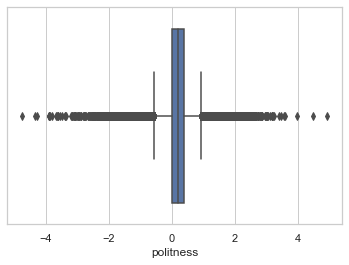

In [457]:


import matplotlib.pyplot as plt

sns.boxplot(x=analysis_df['politness'])
plt.savefig('boxplots/yelp_politeness.png')

In [458]:
analysis_df['stars']=df_review['stars']

In [459]:
analysis_df

,flesch_reading_ease,smog,coleman_liau,sentence_count,gunning_fog,flesch_kincaid_grade,subjectivity,polarity,stars,useful,agg,politness,usefull_bin
0,52.16,12.5,9.41,3,16.90,14.9,0.511420,0.090548,4,0,2,0.067161,0
1,75.03,0.0,8.88,2,10.46,8.1,0.583333,0.591250,3,1,1,0.045530,1
2,80.62,8.2,6.38,5,7.90,6.0,0.484848,0.116585,4,1,1,-0.531268,1
3,66.74,0.0,10.14,2,8.28,7.2,0.480000,-0.090833,3,5,6,-0.053217,1
4,77.37,9.7,6.50,6,9.42,7.2,0.651389,0.035500,3,2,4,-0.157010,1
5,78.28,10.1,11.02,4,8.96,6.9,0.747500,0.322070,5,2,3,0.468315,1
6,84.88,8.2,7.00,5,6.08,4.4,0.737778,0.152500,3,2,2,0.077005,1
7,66.41,0.0,6.98,2,12.67,11.5,0.625000,0.414583,3,4,4,0.266500,1
8,60.28,12.0,7.78,7,12.11,11.7,0.602101,-0.066947,1,9,12,-0.682044,1
9,72.29,10.4,8.65,10,11.00,9.2,0.769587,0.094768,3,1,1,-0.328537,1


In [460]:
analysis_df['date'] =  pd.to_datetime(df_review['date']).dt.date
analysis_df['diff_days'] = dt.datetime.now().date() - analysis_df['date']
analysis_df['diff_days'] = dt.datetime.now().date() - analysis_df['date']
analysis_df['diff_days']=(analysis_df['diff_days']/np.timedelta64(1,'M'))


analysis_df['usefull_diff'] = (analysis_df['useful']/analysis_df['diff_days'])
analysis_df['usefull_diff'].describe()
#usefull_diff
analysis_df['diff_days'] = dt.datetime.now().date() - analysis_df['date']
analysis_df['diff_days']=(analysis_df['diff_days']/np.timedelta64(1,'M'))

In [461]:
analysis_df = analysis_df.drop(['agg','subjectivity','date','usefull_diff'], axis=1)

In [462]:
analysis_df.dtypes
analysis_df.groupby('usefull_bin').count()
#analysis_df.to_csv("D:/Trinity_DS/Dissertations/201907/yelp/analysis.csv",index=False)
#analysis_df.groupby('usefull_bin').mean()
#analysis_df.groupby('usefull_bin').var()

,flesch_reading_ease,smog,coleman_liau,sentence_count,gunning_fog,flesch_kincaid_grade,polarity,stars,useful,politness,diff_days
usefull_bin,,,,,,,,,,,
0,86434,86434,86434,86434,86434,86434,86434,86434,86434,86434,86434
1,68866,68866,68866,68866,68866,68866,68866,68866,68866,68866,68866


In [463]:
analysis_df =  analysis_df.drop(['stars','useful'], axis=1)


In [464]:
list(analysis_df)

['flesch_reading_ease',
 'smog',
 'coleman_liau',
 'sentence_count',
 'gunning_fog',
 'flesch_kincaid_grade',
 'polarity',
 'politness',
 'usefull_bin',
 'diff_days']

In [465]:
X= np.array(analysis_df.drop(['usefull_bin'], axis=1))
#X= np.array(analysis_df['smog'])
Y= np.array(analysis_df['usefull_bin']).astype(int)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=303)
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

# Decision Tree

In [466]:
clf = tree.DecisionTreeClassifier(class_weight='balanced')
clf = clf.fit(X_train_scaled, y_train)
Y_train_Pred=clf.predict(X_train_scaled)
accuracy_score(y_train, Y_train_Pred)

0.9999903893283102

In [467]:
Y_test_Pred=clf.predict(X_test_scaled)
target_names = ['0', '1']
print(classification_report(y_test, Y_test_Pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.63      0.62      0.62     28694
           1       0.52      0.53      0.53     22555

    accuracy                           0.58     51249
   macro avg       0.57      0.57      0.57     51249
weighted avg       0.58      0.58      0.58     51249



D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


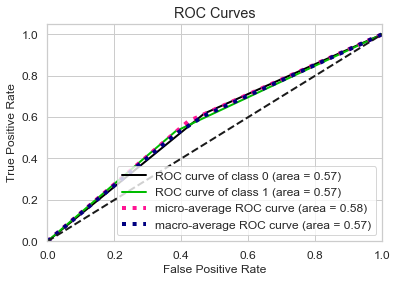

In [468]:

y_test_probs = tree.DecisionTreeClassifier.predict_proba(clf,X_test_scaled)

skplt.metrics.plot_roc_curve(y_test, y_test_probs)
plt.show()

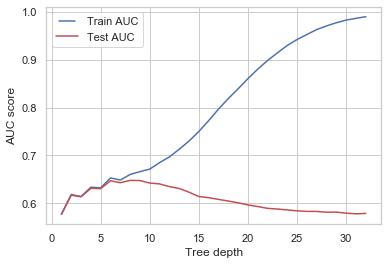

In [469]:
from sklearn.metrics import roc_curve, auc

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = tree.DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train_scaled, y_train)
   train_pred = dt.predict(X_train_scaled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test_scaled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()


D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


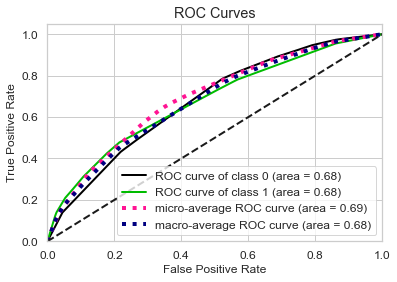

In [470]:
Y_train_Pred=clf.predict(X_train_scaled)

clf_class_select = tree.DecisionTreeClassifier( max_depth=4)
clf_class_select = clf_class_select.fit(X_train_scaled, y_train)
y_test_probs = tree.DecisionTreeClassifier.predict_proba(clf_class_select,X_test_scaled)

skplt.metrics.plot_roc_curve(y_test, y_test_probs)
plt.show()

In [471]:
tree_performance = roc_auc_score(y_test.astype(int), Y_test_Pred.astype(int))

tree_performance

0.5742865310213332

In [472]:
y_pred_dt_final = np.where(y_test_probs[:,0] > 0.5742865310213332, 0, 1)

confusion_matrix(y_test, y_pred_dt_final)


array([[22541,  6153],
       [11795, 10760]], dtype=int64)

In [473]:
print(classification_report(y_test, y_pred_dt_final, target_names=target_names))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72     28694
           1       0.64      0.48      0.55     22555

    accuracy                           0.65     51249
   macro avg       0.65      0.63      0.63     51249
weighted avg       0.65      0.65      0.64     51249



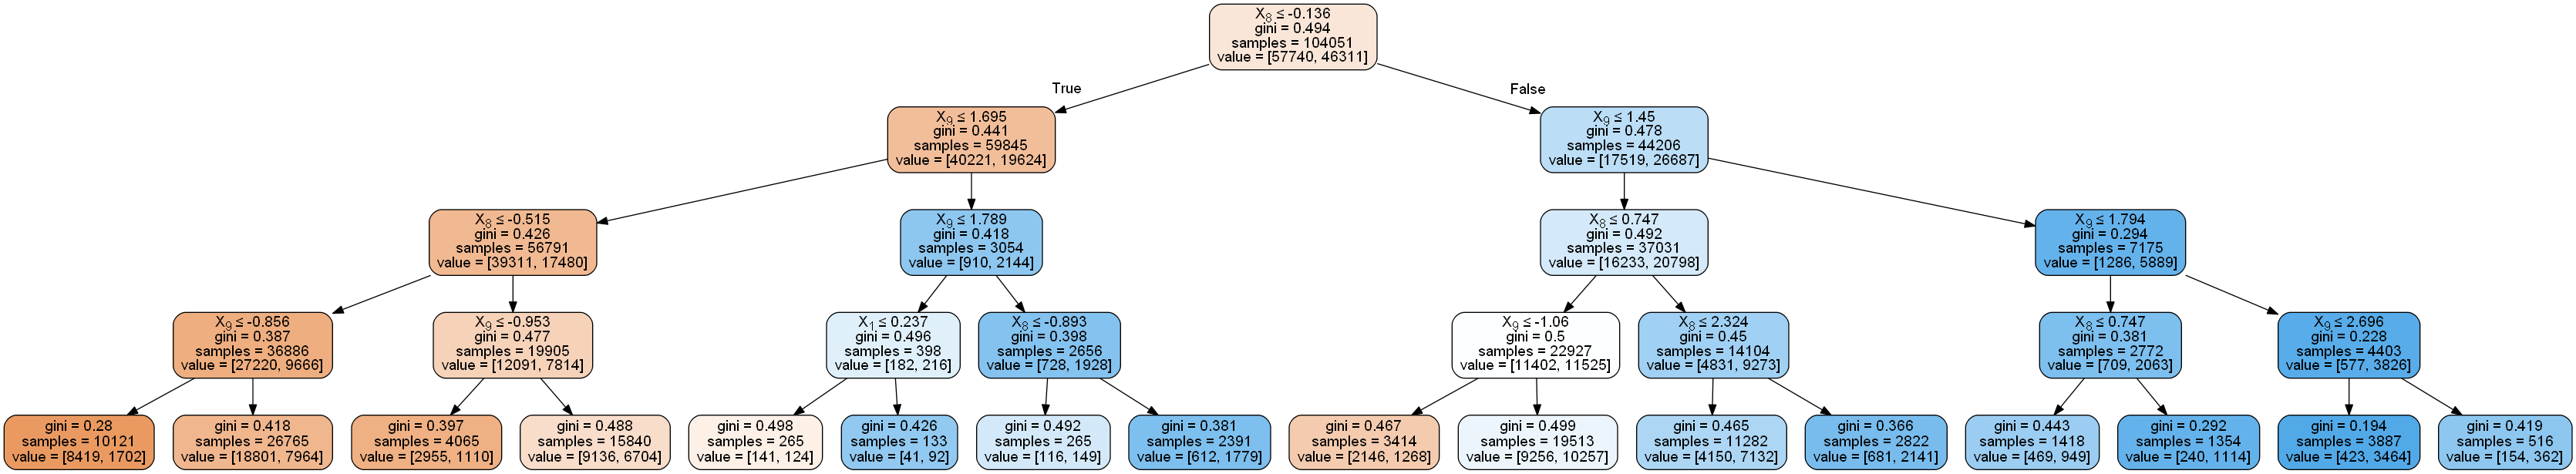

In [267]:
dot_data = StringIO()
export_graphviz(clf_class_select, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [268]:
list(analysis_df)

['flesch_reading_ease',
 'smog',
 'coleman_liau',
 'sentence_count',
 'gunning_fog',
 'flesch_kincaid_grade',
 'polarity',
 'politness',
 'spelling_errors',
 'usefull_bin',
 'diff_days']

In [269]:
graph.write_pdf("Yelp_decsion_tree.pdf")

True

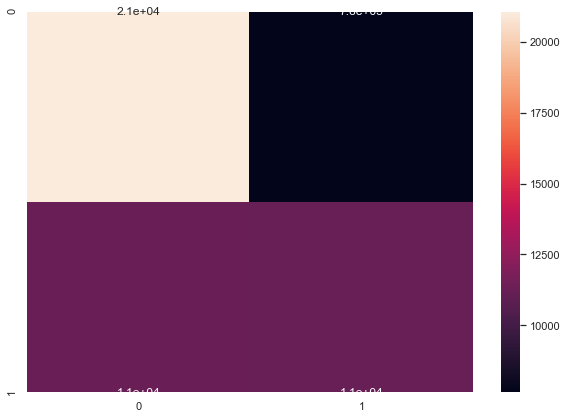

In [167]:
input_array = confusion_matrix(y_test, y_pred_dt_final)
df_cm = pd.DataFrame(input_array, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

# Support Vector Machines

In [27]:
list(analysis_df)
list(analysis_df)

['flesch_reading_ease',
 'smog',
 'coleman_liau',
 'sentence_count',
 'gunning_fog',
 'flesch_kincaid_grade',
 'subjectivity',
 'polarity',
 'stars',
 'useful',
 'agg',
 'politness',
 'usefull_bin']

In [28]:
list(analysis_df)
X= np.array(analysis_df.drop(['usefull_bin','agg','useful','flesch_kincaid_grade','subjectivity'], axis=1))
#X= np.array(analysis_df['smog'])
Y= np.array(analysis_df['usefull_bin'])
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=303)
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [78]:
clf_SVM = SVC(gamma='auto',class_weight='balanced')
clf_SVM.fit(X_train_scaled, y_train) 

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [79]:
Y_train_Pred=clf_SVM.predict(X_train_scaled)
accuracy_score(y_train, Y_train_Pred)

0.6383888669979145

In [80]:
Y_test_SVM_Pred=clf_SVM.predict(X_test_scaled)
Y_test_SVM_Pred
target_names=['0','1']
print(classification_report(y_test, Y_test_SVM_Pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66     28694
           1       0.58      0.63      0.60     22555

    accuracy                           0.64     51249
   macro avg       0.63      0.63      0.63     51249
weighted avg       0.64      0.64      0.64     51249



# Random Forest

In [121]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [100, 118, 136, 155, 173, 191, 210, 228, 246, 265, 283, 302, 320, 338, 357, 375, 393, 412, 430, 448, 467, 485, 504, 522, 540, 559, 577, 595, 614, 632, 651, 669, 687, 706, 724, 742, 761, 779, 797, 816, 834, 853, 871, 889, 908, 926, 944, 963, 981, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]
15


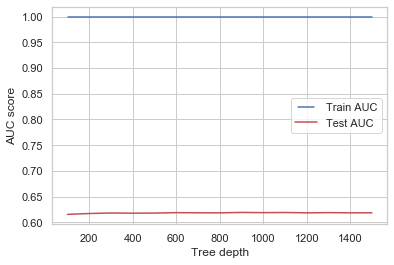

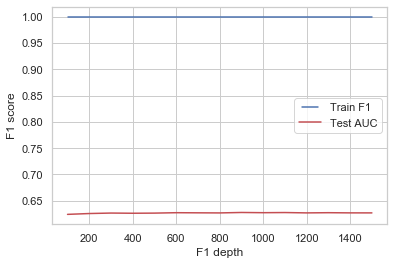

In [152]:

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 15)]
print(n_estimators)
f1_score_test=[]
auc_score_train=[]
f1_score_train=[]
auc_score_test=[]
for n in n_estimators:
   clf_RF = RandomForestClassifier(n_estimators=n,random_state=0)
   clf_RF.fit(X_train_scaled, y_train)
   train_pred = clf_RF.predict(X_train_scaled)
   y_pred = clf_RF.predict(X_test_scaled)
   f1_score_train.append(f1_score(y_train, train_pred, average='weighted'))
   f1_score_test.append(f1_score(y_test, y_pred, average='weighted'))
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   auc_score_train.append(roc_auc)
   y_pred = clf_RF.predict(X_test_scaled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   auc_score_test.append(roc_auc)
print(len(auc_score_train))
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, auc_score_train, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, auc_score_test, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

line1, = plt.plot(n_estimators, f1_score_train, 'b', label="Train F1")
line2, = plt.plot(n_estimators, f1_score_test, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 score')
plt.xlabel('F1 depth')
plt.show()

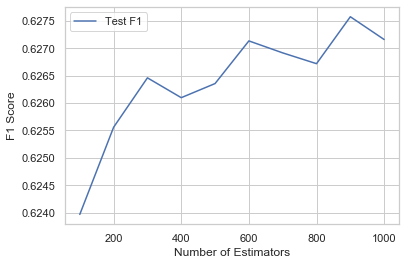

In [185]:
line1, = plt.plot(n_estimators[0:10], f1_score_test[0:10], 'b', label="Test F1")
#line2, = plt.plot(n_estimators[0:10], auc_score_test[0:10], 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=1)})
plt.ylabel('F1 Score')
plt.xlabel('Number of Estimators')
plt.show()

In [160]:
f1_score_test

[0.6239671605770257,
 0.6255588567235053,
 0.6264612909952691,
 0.6260989585116697,
 0.6263568172909308,
 0.6271356309048987,
 0.6269169344718396,
 0.6267197533991687,
 0.6275768890637454,
 0.627160901870341,
 0.6274441991147701,
 0.626777175647539,
 0.6271537161948589,
 0.6268199947695424,
 0.6267770925099261]

In [270]:
clf_RF = RandomForestClassifier(n_estimators=300,random_state=0,max_depth=4,class_weight='balanced')
clf_RF.fit(X_train_scaled, y_train)
Y_train_Pred=clf_RF.predict(X_train_scaled)
Y_test_RF_Pred=clf_RF.predict(X_test_scaled)
print("Training Accuracy",accuracy_score(y_train, Y_train_Pred))
target_names=['0','1']
print(classification_report(y_test, Y_test_RF_Pred, target_names=target_names))

Training Accuracy 0.6599648249416151
              precision    recall  f1-score   support

           0       0.71      0.66      0.68     28694
           1       0.60      0.65      0.62     22555

    accuracy                           0.65     51249
   macro avg       0.65      0.65      0.65     51249
weighted avg       0.66      0.65      0.66     51249



In [272]:
temp = ['flesch_reading_ease','smog','coleman_liau','sentence_count','gunning_fog','flesch_kincaid_grade','polarity','politness','spelling_errors','diff_days']
print(list(temp))
clf_RF.feature_importances_ 

['flesch_reading_ease', 'smog', 'coleman_liau', 'sentence_count', 'gunning_fog', 'flesch_kincaid_grade', 'polarity', 'politness', 'spelling_errors', 'diff_days']


array([0.01539836, 0.02675655, 0.00200246, 0.09200372, 0.06508753,
       0.08470404, 0.00316543, 0.00924465, 0.41681037, 0.28482688])

In [31]:
print('R^2 Training Score: {:.2f} \nOOB R^2 Validation Score: {:.2f}'.format(clf_RF.score(X_train_scaled, y_train),
                                                                                             clf_RF.score(X_test_scaled, y_test)))

R^2 Training Score: 1.00 
OOB R^2 Validation Score: 0.63


In [32]:
clf_RF = RandomForestClassifier(n_estimators=1000,random_state=0,max_depth=4,class_weight='balanced')
clf_RF.fit(X_train_scaled, y_train)
Y_train_Pred=clf_RF.predict(X_train_scaled)
Y_test_RF_Pred=clf_RF.predict(X_test_scaled)
print("Training Accuracy",accuracy_score(y_train, Y_train_Pred))
target_names=['0','1']
print(classification_report(y_test, Y_test_RF_Pred, target_names=target_names))

Training Accuracy 0.6348425291443619
              precision    recall  f1-score   support

           0       0.68      0.63      0.66     28694
           1       0.57      0.62      0.60     22555

    accuracy                           0.63     51249
   macro avg       0.63      0.63      0.63     51249
weighted avg       0.63      0.63      0.63     51249



In [33]:
clf_RF = RandomForestClassifier(n_estimators=2000,random_state=0,oob_score=True)
clf_RF.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [34]:
Y_train_Pred=clf_RF.predict(X_train_scaled)
accuracy_score(y_train, Y_train_Pred)

0.9999807786566203

In [35]:
Y_test_RF_Pred=clf_RF.predict(X_test)
target_names=['0','1']
print(classification_report(y_test, Y_test_RF_Pred, target_names=target_names))

D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     28694
           1       0.44      1.00      0.61     22555

    accuracy                           0.44     51249
   macro avg       0.22      0.50      0.31     51249
weighted avg       0.19      0.44      0.27     51249



In [36]:
print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(clf_RF.score(X_train_scaled, y_train), 
                                                                                             clf_RF.oob_score_,
                                                                                             clf_RF.score(X_test_scaled, y_test)))

R^2 Training Score: 1.00 
OOB Score: 0.63 
R^2 Validation Score: 0.63


In [37]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=analysis_df["log_usefull"])


KeyError: 'log_usefull'

In [ ]:
print(list(analysis_df))
analysis_df['log_usefull']=np.log(analysis_df['useful']+1)
print(analysis_df.dtypes)
sns.set(style="whitegrid")
sns.distplot(analysis_df["log_usefull"],bins=int(180/5),  hist=True, kde=True, color = 'darkblue', 
            )

In [ ]:
ax = sns.boxplot(x=analysis_df["log_usefull"])

In [189]:
analysis_df['date'] =  pd.to_datetime(df_review['date']).dt.date
#filtered_df = data_df[data_df['reviews_dateAdded_Date_time'].notnull()]
#filtered_df = data_df[data_df['reviews_date_Date_time'].notnull()]
#analysis_df['date']-dt.datetime.now().date()-

In [190]:
analysis_df['diff_days'] = dt.datetime.now().date() - analysis_df['date']
analysis_df['diff_days']=(analysis_df['diff_days']/np.timedelta64(1,'M'))


analysis_df['usefull_diff'] = (analysis_df['useful']/analysis_df['diff_days'])
analysis_df['usefull_diff'].describe()
#usefull_diff

count    155300.000000
mean          0.020516
std           0.060071
min           0.000000
25%           0.000000
50%           0.000000
75%           0.025838
max           3.469488
Name: usefull_diff, dtype: float64

In [191]:
analysis_df['diff_days'] = dt.datetime.now().date() - analysis_df['date']
analysis_df['diff_days']=(analysis_df['diff_days']/np.timedelta64(1,'M'))

In [488]:
analysis_df

,flesch_R_ease,smog,coleman_liau,sentence_count,gunning_fog,flesch_k_grade,polarity,politness,usefull_bin,diff_days,stars,subjectivity
0,52.16,12.5,9.41,3,16.90,14.9,0.090548,0.067161,0,87.032588,4,0.511420
1,75.03,0.0,8.88,2,10.46,8.1,0.591250,0.045530,1,78.030350,3,0.583333
2,80.62,8.2,6.38,5,7.90,6.0,0.116585,-0.531268,1,75.369104,4,0.484848
3,66.74,0.0,10.14,2,8.28,7.2,-0.090833,-0.053217,1,94.457792,3,0.480000
4,77.37,9.7,6.50,6,9.42,7.2,0.035500,-0.157010,1,80.264482,3,0.651389
5,78.28,10.1,11.02,4,8.96,6.9,0.322070,0.468315,1,108.881086,5,0.747500
6,84.88,8.2,7.00,5,6.08,4.4,0.152500,0.077005,1,106.876938,3,0.737778
7,66.41,0.0,6.98,2,12.67,11.5,0.414583,0.266500,1,82.597179,3,0.625000
8,60.28,12.0,7.78,7,12.11,11.7,-0.066947,-0.682044,1,81.381548,1,0.602101
9,72.29,10.4,8.65,10,11.00,9.2,0.094768,-0.328537,1,81.742952,3,0.769587


In [544]:
temp_corr_df = analysis_df.drop(['subjectivity','log_usefull'], axis=1)

In [551]:
temp_corr_df['stars']= df_review['stars']
temp_corr_df['spelling_errors']= spelling_errors
temp_corr_df['stars']= df_review['useful']

In [552]:
temp_corr_df

,FRSE,smog,coleman_liau,sentence_count,gunning_fog,FKGE,polarity,politeness,No.Days,stars,predicted_bin,useful,spelling_errors
0,52.16,12.5,9.41,3,16.90,14.9,0.090548,0.067161,87.032588,0,0,0,18
1,75.03,0.0,8.88,2,10.46,8.1,0.591250,0.045530,78.030350,1,1,1,8
2,80.62,8.2,6.38,5,7.90,6.0,0.116585,-0.531268,75.369104,1,0,1,12
3,66.74,0.0,10.14,2,8.28,7.2,-0.090833,-0.053217,94.457792,5,1,5,7
4,77.37,9.7,6.50,6,9.42,7.2,0.035500,-0.157010,80.264482,2,0,2,14
5,78.28,10.1,11.02,4,8.96,6.9,0.322070,0.468315,108.881086,2,1,2,10
6,84.88,8.2,7.00,5,6.08,4.4,0.152500,0.077005,106.876938,2,1,2,6
7,66.41,0.0,6.98,2,12.67,11.5,0.414583,0.266500,82.597179,4,0,4,8
8,60.28,12.0,7.78,7,12.11,11.7,-0.066947,-0.682044,81.381548,9,0,9,26
9,72.29,10.4,8.65,10,11.00,9.2,0.094768,-0.328537,81.742952,1,0,1,32


In [555]:
temp_corr_df.rename(columns={
    'flesch_R_ease':'FRSE',
    'flesch_k_grade':'FKGE',
    'smog':'SMOG',
     'politness':'politeness',
    'diff_days':'No.Days',
    'sentence_count': 'sent_cnt',
    'gunning_fog': 'Gunning',
    'coleman_liau':"Coleman",
    'spelling_errors': 'Spell_err:'
}, inplace=True
                   )




In [557]:

#(analysis_df['diff_days']/np.timedelta64(1,'M')).describe()
corr_df = temp_corr_df
corr = (corr_df.corr())



corr = np.round((corr_df.corr()),2)
corr.style.background_gradient(cmap='PuBu') 

,FRSE,SMOG,Coleman,sent_cnt,Gunning,FKGE,polarity,politeness,No.Days,stars,predicted_bin,useful,Spell_err:
FRSE,1,0.28,-0.68,0.23,-0.71,-0.9,0.06,-0.01,-0.12,-0.09,0,-0.09,-0.22
SMOG,0.28,1,-0.03,0.48,-0.36,-0.35,-0.08,0.04,-0.04,0.1,0.01,0.1,0.3
Coleman,-0.68,-0.03,1,-0.02,-0.01,0.33,-0.02,-0,-0.01,-0.01,-0,-0.01,-0.02
sent_cnt,0.23,0.48,-0.02,1,-0.29,-0.28,-0.12,0.01,-0.02,0.17,0,0.17,0.64
Gunning,-0.71,-0.36,-0.01,-0.29,1,0.94,-0.08,0.02,0.19,0.13,-0,0.13,0.33
FKGE,-0.9,-0.35,0.33,-0.28,0.94,1,-0.08,0.01,0.17,0.12,-0,0.12,0.31
polarity,0.06,-0.08,-0.02,-0.12,-0.08,-0.08,1,0.31,-0.02,-0.09,-0,-0.09,-0.16
politeness,-0.01,0.04,-0,0.01,0.02,0.01,0.31,1,0.03,-0.01,0,-0.01,0.04
No.Days,-0.12,-0.04,-0.01,-0.02,0.19,0.17,-0.02,0.03,1,0.17,-0.01,0.17,0.18
stars,-0.09,0.1,-0.01,0.17,0.13,0.12,-0.09,-0.01,0.17,1,-0,1,0.3


In [ ]:
plt.figure(figsize= (10, 10))
sns.heatmap(corr_df.corr())
fig, ax = plt.subplots(figsize=(10, 10)) 
mask = np.zeros_like(corr_df.corr())

mask[np.triu_indices_from(mask)] = 1
sns.heatmap(corr_df.corr(), mask= mask, ax= ax, annot= True,annot_kws={"size": 11},fmt='.2f')


In [ ]:
analysis_df[['subjectivity','polarity']]

# Regression Analysis

In [568]:
list(analysis_df)

['flesch_R_ease',
 'smog',
 'coleman_liau',
 'sentence_count',
 'gunning_fog',
 'flesch_k_grade',
 'polarity',
 'politness',
 'diff_days',
 'stars',
 'subjectivity',
 'predicted_bin',
 'useful',
 'log_usefull']

In [497]:
list(analysis_df)
analysis_df['useful'] = df_review[['useful']]

In [498]:
analysis_df = analysis_df.drop(['usefull_bin'], axis=1)

In [499]:
predicted_bin = np.concatenate((Y_train_Pred,Y_test_RF_Pred), axis=0)
analysis_df['predicted_bin'] = predicted_bin
analysis_df['log_usefull']=np.log(analysis_df['useful']+1)

In [501]:
X= np.array(analysis_df.drop(['log_usefull','useful'], axis=1))
#X= np.array(analysis_df['smog'])
Y= np.array(analysis_df['log_usefull'])
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=303)
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [381]:
reg = LinearRegression().fit(X_train_scaled, y_train)
y_pred=reg.predict(X_test_scaled)
#scaler.transform(X_test)
(mean_squared_error(np.log(y_test+1), ((y_pred)))**0.5)*100


39.35700040199631

In [382]:
r2_score(y_test,(np.exp(y_pred)-1))

-0.20717905734296704

In [371]:
alpha=[0.1,100000,1000000,100000,100000,10000,1000,100,10]  
alpha.sort()
print(alpha)
log_error_train=[]
log_error_test=[]
for x in alpha:
    clf_ridge = Ridge(alpha=x)
    clf_ridge.fit(X_train_scaled, y_train) 
    y_pred_0=clf_ridge.predict(X_train_scaled)
    y_pred=clf_ridge.predict(X_train_scaled)
    y_pred=clf_ridge.predict(X_test_scaled)
    #scaler.transform(X_test)
    log_error_train.append(mean_squared_error(np.log(y_test+1), ((y_pred)))**0.5*100)
    log_error_test.append(mean_squared_error(np.log(y_test+1), ((y_pred)))**0.5*100)
    print("alpha=",x," : Train Error : ",mean_squared_error(y_train,np.exp(y_pred_0)-1)*100," : TEST Error : ",mean_squared_error(y_test,np.exp(y_pred)-1)*100)


[0.1, 10, 100, 1000, 10000, 100000, 100000, 100000, 1000000]
alpha= 0.1  : Train Error :  45.294114545132814  : TEST Error :  45.71673117726735
alpha= 10  : Train Error :  45.29927428979488  : TEST Error :  45.70318653334341
alpha= 100  : Train Error :  45.307755917668096  : TEST Error :  45.62533061191913
alpha= 1000  : Train Error :  44.98886092479353  : TEST Error :  45.17168755816135
alpha= 10000  : Train Error :  42.384969554829766  : TEST Error :  42.411265422937575
alpha= 100000  : Train Error :  35.12387878895639  : TEST Error :  35.131393089829274
alpha= 100000  : Train Error :  35.12387878895639  : TEST Error :  35.131393089829274
alpha= 100000  : Train Error :  35.12387878895639  : TEST Error :  35.131393089829274
alpha= 1000000  : Train Error :  36.95725979672878  : TEST Error :  36.88673250901747


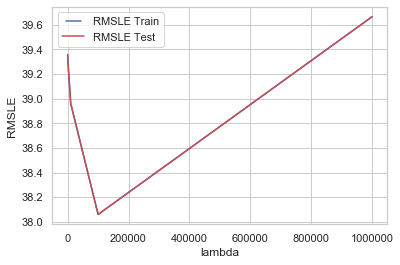

In [384]:
line1, = plt.plot(alpha, log_error_train, 'b', label="RMSLE Train")
line2, = plt.plot(alpha, log_error_test, 'r', label="RMSLE Test")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSLE')
plt.xlabel('lambda')
plt.show()

In [515]:
#analysis_df.to_csv("D:/Trinity_DS/Dissertations/201907/dataset_v2/analysis_df.csv", index = None, header=True)
clf_ridge = Ridge(alpha=100000)
clf_ridge.fit(X_train_scaled, y_train) 
y_pred_0=clf_ridge.predict(X_train_scaled)
#scaler.transform(X_test)
mean_squared_error(y_train,np.exp(y_pred_0)-1)*100

34.73620199865216

In [516]:
y_pred=clf_ridge.predict(X_test_scaled)
#scaler.transform(X_test)
(mean_squared_error(np.log(y_test+1), ((y_pred)))**0.5)*100


38.21337377876904

In [597]:
r2_score(y_test,np.round(np.exp(y_pred)-1,0))

-0.2768181213773835

In [599]:
(mean_squared_error(y_test,np.round(np.exp(y_pred)-1,0)))**0.5*100


69.53716232053733

In [388]:
print(((np.exp(y_pred))-1).mean())
print(y_test.mean())

0.6320854696650281
0.4702648266020291


In [ ]:
y_pred.std()

In [ ]:
((sum((y_pred-y_test)**2))/len(y_pred))**0.5*100

# RandomForest Regressor

In [573]:
list(new_regress_df)

['flesch_R_ease',
 'smog',
 'coleman_liau',
 'sentence_count',
 'gunning_fog',
 'flesch_k_grade',
 'polarity',
 'politness',
 'diff_days',
 'flesch_R_ease',
 'log_usefull']

In [608]:
new_regress_df=analysis_df[['flesch_R_ease','smog','coleman_liau','sentence_count','gunning_fog','flesch_k_grade',
                          'polarity','politness','diff_days','log_usefull']]

In [609]:
predicted_bin = np.concatenate((Y_train_Pred,Y_test_RF_Pred), axis=0)
new_regress_df['predicted_bin'] = predicted_bin

D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [610]:
X= np.array(new_regress_df.drop(['log_usefull'], axis=1))
#X= np.array(analysis_df['smog'])
Y= np.array(new_regress_df['log_usefull'])
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=303)
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [611]:
from sklearn.ensemble import RandomForestRegressor
rf_regr = RandomForestRegressor( max_depth=4,random_state=0,
                             n_estimators=400)
rf_regr.fit(X_train, y_train)
y_rf_pred = rf_regr.predict(X_test)

In [612]:
mean_squared_error(np.log(y_test+1), ((y_rf_pred)))**0.5*100

39.40423472359163

In [613]:
(np.exp(y_rf_pred)-1).min()

0.21615473740183155

In [614]:
r2_score(y_test,(np.exp(y_rf_pred)-1))

-0.04040381488176936

In [615]:
#
r2_score(np.log(y_test+1), ((y_rf_pred)))

-0.10257349567658625

In [616]:
rf_regr.feature_importances_

array([4.70328581e-03, 2.70541331e-03, 1.80548292e-03, 2.98318219e-01,
       8.09025748e-02, 1.55241896e-01, 1.17008440e-03, 3.74105014e-04,
       4.54778939e-01, 0.00000000e+00])

In [607]:
list(new_regress_df)

['flesch_R_ease',
 'smog',
 'coleman_liau',
 'sentence_count',
 'gunning_fog',
 'flesch_k_grade',
 'polarity',
 'politness',
 'diff_days',
 'log_usefull',
 'predicted_bin']

In [594]:
r2_score(y_test,np.round(np.exp(y_rf_pred)-1,0))

-0.46477445535808615

In [583]:
max()

3.0

In [585]:
mean_squared_error(y_test, np.round(np.exp(y_rf_pred)-1,0))*100

55.472232899856486

# Politness Vs Helpfull and Polite vs Stars

In [ ]:
X= np.array(analysis_df['politness'])
#X= np.array(analysis_df['smog'])
Y= np.array(analysis_df['log_usefull'])
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=303)
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
reg = LinearRegression().fit(X_train_scaled.reshape(-1, 1), y_train)
y_pred=reg.predict(X_test_scaled.reshape(-1, 1))
#scaler.transform(X_test)
print(r2_score(y_test, (np.exp(y_pred))-1))
(mean_squared_error(y_test, (np.exp(y_pred)-1))**0.5)*100

# Merged Analysis

In [ ]:
list(analysis_df)
review_roll_up_df=analysis_df.drop(['usefull_bin','date','diff_days'], axis=1)
review_roll_up_df['user_id'] = df_review['user_id']
#business_id
review_roll_up_df['business_id'] = df_review['business_id']
g1 = review_roll_up_df.groupby(['user_id','business_id']).sum()

In [ ]:
review_roll_up_df=g1.reset_index()
join_review_user=pd.merge(df_user, review_roll_up_df,on='user_id')

In [ ]:
list(join_review_user)
join_review_user=join_review_user.drop([
    'user_id',
 'name',
 'yelping_since',
 'funny',
 'cool',
 'fans',
 'compliment_hot',
 'compliment_more',
 'compliment_profile',
 'compliment_cute',
 'compliment_list',
 'compliment_note',
 'compliment_plain',
 'compliment_cool',
 'compliment_funny',
 'compliment_writer',
 'compliment_photos'
], axis=1)
g2 = join_review_user.groupby(['business_id']).sum()
business_lvl_review_user=g2.reset_index()

In [ ]:
join_review_user=pd.merge(df_business.dropna(subset='business_id'),business_lvl_review_user.dropna(subset='business_id') ,on='business_id')

In [ ]:
list(analysis_df)

In [ ]:
join_review_user=pd.merge(df_user, review_roll_up_df1,on='user_id')
list(join_review_user)
join_review_user['business_id']

In [ ]:
merged_final_df=pd.merge(df_business, join_review_user,on='business_id',how='right')

In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker()  # loads default word frequency list


# if I just want to make sure some words are not flagged as misspelled
spell.word_frequency.load_words(['microsoft', 'apple', 'google'])
spell.known(['microsoft', 'google','asd'])  # will return both now!

In [ ]:
misspelled = spell.unknown(['something', 'is', 'hapenning', 'here'])
len(misspelled)